In [13]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

llm = ChatOpenAI(model="gpt-4o")

In [14]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


class State(TypedDict):
  messages: Annotated[list[str], add_messages]


graph_builder = StateGraph(State)

In [15]:
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper


@tool
def get_current_time(timezone: str, location: str) -> str:
  """현재 시각을 반환하는 함수"""
  try:
    tz = pytz.timezone(timezone)
    now = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
    result = f'{timezone} ({location}) 현재 시각 {now}'
    return result
  except pytz.UnknownTimeZoneError:
    return f"알 수 없는 타임존: {timezone}"


@tool
def get_web_search(query: str, search_period: str = 'm') -> str:
  """
  웹 검색을 수행하는 함수

  Args:
      query (str): 검색어
      search_period (str): 검색 기간 (e.g, "w" for past week, "m" for past month, "y" for past year

  Return:
    str: 검색 결과
  """
  wrapper = DuckDuckGoSearchAPIWrapper(
      time=search_period
  )

  print('\n--------- WEB SEARCH -----------')
  print(query)
  print(search_period)

  search = DuckDuckGoSearchResults(
      api_wrapper=wrapper,
      results_separator=';\n'
  )

  searched = search.invoke(query)

  for i, result in enumerate(searched.split('l\n')):
    print(f'{i + 1}. {result}')

  return searched


tools = [get_current_time, get_web_search]

In [16]:
tools[0].invoke({"timezone": "Asia/Seoul", "location": " 서울"})

'Asia/Seoul ( 서울) 현재 시각 2025-10-20 22:41:02'

In [17]:
tools[1].invoke({"query": "25-26시즌 NBA", "search_period": "m"})


--------- WEB SEARCH -----------
25-26시즌 NBA
m
1. snippet: Sep 15, 2025 · 인천국제공항 은 25번 게이트가 없다. 그런데 4번, 44번, 244번 게이트는 4자 금기, 13번 게이트는 13 공포증 으로 결번 사유가 알려진 것과는 달리 25번 게이트의 결번 사유는 …, title: 25 - 나무위키, link: https://namu.wiki/w/25;
snippet: Oct 4, 2025 · 육상 트랙 경기 중 최장 거리 경기인 10,000m 경기는 400m 트랙을 25바퀴 (400×25) 도는 경기다. 배구에서 25점을 따면 세트를 따낸다., title: 25 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/25;
snippet: 25년 독감예방접종은 어린이·임신부·어르신이 무료 대상이며, 9~11월에 맞추면 학사·동절기 일정에 가장 유리합니다. 무료 대상이 아니어도 지정의료기관을 통해 합리적으로 접종할 수 …, title: 25년 독감예방접종 시기·비용·무료 대상자 총정리 : 네이버 블로그, link: https://blog.naver.com/lifecode101/224037386818;
snippet: Sep 18, 2024 · 이 글에서는 25년 추석 연휴의 날짜부터 연휴를 즐기는 다양한 방법까지 간결하게 정리했으니 참고하여 도움되시기 바란다., title: 25년 공휴일 추석연휴 정리 (황금연휴) : 네이버 블로그, link: https://m.blog.naver.com/88labstory/223587080974


/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


'snippet: Sep 15, 2025 · 인천국제공항 은 25번 게이트가 없다. 그런데 4번, 44번, 244번 게이트는 4자 금기, 13번 게이트는 13 공포증 으로 결번 사유가 알려진 것과는 달리 25번 게이트의 결번 사유는 …, title: 25 - 나무위키, link: https://namu.wiki/w/25;\nsnippet: Oct 4, 2025 · 육상 트랙 경기 중 최장 거리 경기인 10,000m 경기는 400m 트랙을 25바퀴 (400×25) 도는 경기다. 배구에서 25점을 따면 세트를 따낸다., title: 25 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/25;\nsnippet: 25년 독감예방접종은 어린이·임신부·어르신이 무료 대상이며, 9~11월에 맞추면 학사·동절기 일정에 가장 유리합니다. 무료 대상이 아니어도 지정의료기관을 통해 합리적으로 접종할 수 …, title: 25년 독감예방접종 시기·비용·무료 대상자 총정리 : 네이버 블로그, link: https://blog.naver.com/lifecode101/224037386818;\nsnippet: Sep 18, 2024 · 이 글에서는 25년 추석 연휴의 날짜부터 연휴를 즐기는 다양한 방법까지 간결하게 정리했으니 참고하여 도움되시기 바란다., title: 25년 공휴일 추석연휴 정리 (황금연휴) : 네이버 블로그, link: https://m.blog.naver.com/88labstory/223587080974'

In [18]:
for tool in tools:
  print(tool.name, tool)

get_current_time name='get_current_time' description='현재 시각을 반환하는 함수' args_schema=<class 'langchain_core.utils.pydantic.get_current_time'> func=<function get_current_time at 0x13241e3e0>
get_web_search name='get_web_search' description='웹 검색을 수행하는 함수\n\nArgs:\n    query (str): 검색어\n    search_period (str): 검색 기간 (e.g, "w" for past week, "m" for past month, "y" for past year\n\nReturn:\n  str: 검색 결과' args_schema=<class 'langchain_core.utils.pydantic.get_web_search'> func=<function get_web_search at 0x13241dd00>


In [19]:
llm_with_tools = llm.bind_tools(tools)


def generate(state: State):
  """
  주어진 상태를 기반으로 챗봇의 응답 메시지를 생성한다.

  매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있다.

  반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리.
          형식은 {"messages": [응답 메시지]}입니다.
  """
  return {"messages": llm_with_tools.invoke(state["messages"])}


graph_builder.add_node("generate", generate)

In [20]:
import json
from langchain_core.messages import ToolMessage


class BasicToolNode:
  """
  도구를 실행하는 노드 클래스. 마지막 AIMessages에서 요청된 도구를 실행한다.
  Attributes:
    tools_by_name (dict): 도구 이름을 키로 하고 도구 객체를 값으로 가지는 사전
  Methods:
    __init__(tools: list): 도구 객체들의 리스트를 받아서 초기화합니다.
    __call__(inputs: dict): 입력 메시지를 받아서 도구를 실행하고 결과 메시지를 반환합니다.
  """
  """A node that runs the tools requested in the last AIMessage."""

  def __init__(self, tools: list) -> None:
    self.tools_by_name = {tool.name: tool for tool in tools}

  def __call__(self, inputs: dict):
    if messages := inputs.get("messages", []):
      message = messages[-1]
    else:
      raise ValueError("No message found in input")
    outputs = []
    for tool_call in message.tool_calls:
      tool_result = self.tools_by_name[tool_call["name"]].invoke(tool_call["args"])

      outputs.append(
          ToolMessage(
              content=json.dumps(tool_result),
              name=tool_call["name"],
              tool_call_id=tool_call["id"],
          )
      )
    return {"messages": messages + outputs}


tool_node = BasicToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [21]:
from langgraph.graph import START, END


def route_tools(state: State):
  """
  마지막 메시지에 도구 호출이 있는 경우 ToolNode로 라우팅하고,
  그렇지 않은 경우 끝으로 라우팅하기 위해 conditional_edge에서 사용합니다.
  """
  if isinstance(state, list):
    ai_message = state[-1]
  elif messages := state.get("messages", []):
    ai_message = messages[-1]
  else:
    raise ValueError(f"tool_edge 입력 상태에서 메시지를 찾을 수 없습니다: {state}")

  if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
    return "tools"
  return END


graph_builder.add_edge(START, "generate")
graph_builder.add_conditional_edges(
    "generate",
    route_tools,
    {"tools": "tools", END: END},
)

graph_builder.add_edge("tools", "generate")
graph = graph_builder.compile()

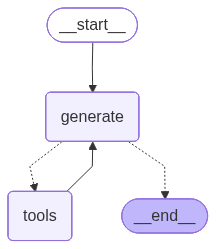

In [22]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [23]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content="지금 서울 몇 시야?")]

gathered = None

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
  if isinstance(msg, AIMessageChunk):
    print(msg.content, end='')

    if gathered is None:
      gathered = msg
    else:
      gathered = gathered + msg

gathered

지금 서울의 시간은 2025년 10월 20일 22시 41분입니다.

AIMessageChunk(content='지금 서울의 시간은 2025년 10월 20일 22시 41분입니다.', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_K720HPoxWcL6fAiKMN7zFESt', 'function': {'arguments': '{"timezone":"Asia/Seoul","location":"서울"}', 'name': 'get_current_time'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_callsstop', 'model_name': 'gpt-4o-2024-08-06gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567fp_cbf1785567'}, id='run--a1bebc55-aca4-4561-9ac4-5b50abb4b50d', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': '서울'}, 'id': 'call_K720HPoxWcL6fAiKMN7zFESt', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"서울"}', 'id': 'call_K720HPoxWcL6fAiKMN7zFESt', 'index': 0, 'type': 'tool_call_chunk'}])

In [24]:
from langchain_core.messages import AIMessageChunk, SystemMessage

about = "25-26시즌 LA레이커스"

inputs = [
  SystemMessage(
      content=f"""
너는 신문기자이다.
최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.

- 최근 어떤 이슈가 있는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘.
- 그 내용으로 원고를 작성하기 위한 목차를 만들고, 목차 내용을 채우기 위해 추가로 검색할 내용을 리스트로 정리해봐.
- 검색할 리스트를 토대로 재검색을 한다.
- 목차에 있는 내용을 작성하기 위해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해라.
- 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋다.

더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성하라.
제목, 부제, 리드문, 본문의 구성으로 작성하라. 본문 내용은 심층 분석 기사에 맞게 구체적이고 깊이 있게 작성해야 한다.
"""
  )
]

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
  if isinstance(msg, AIMessageChunk):
    print(msg.content, end='')


--------- WEB SEARCH -----------
LA Lakers 25-26 season issues
w
1. snippet: Aug 24, 2018 · 节点锚入梁内的锚固长度？ 我想问一下这个节点锚入梁内的长度是多少？ 按一个锚固长度la计算吗？ 那la的依据是什么，按照什么确定是35d还 …, title: 未注明钢筋锚固长度la是多少?-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1922806;
snippet: Mar 17, 2018 · 钢筋图中的La长度应该如何计算 请问图中的LA长度应该怎么计算，谢谢 补充问题： 图纸要求16图集 我来答 收藏 举报 全部回答 (3) 首答仅用1 …, title: 钢筋图中的La长度应该如何计算-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1749532;
snippet: Oct 24, 2014 · 关于钢筋中lae，la,以及laf之间的关系？ 它们之间是什么关系，比如说混凝土等级是C35的，钢筋直接是d，那么它的la，lae，laf各是什么？, title: 关于钢筋中lae，la,以及laf之间的关系？-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1240607;
snippet: Jan 9, 2025 · 刚开始学钢结构，这种檩条怎么计算长度？ 这个楼板阳角的放射筋怎么计算长度 2020-08-11 11:26:58 补充能不能讲的详细一点，计算公式可以写 …, title: la和lae怎么计算长度-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/4334925


/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(



--------- WEB SEARCH -----------
LA Lakers 2025-2026 season issues
w


/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


1. snippet: Aug 24, 2018 · 节点锚入梁内的锚固长度？ 我想问一下这个节点锚入梁内的长度是多少？ 按一个锚固长度la计算吗？ 那la的依据是什 …, title: 未注明钢筋锚固长度la是多少?-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1922806;
snippet: Mar 17, 2018 · 钢筋图中的La长度应该如何计算 请问图中的LA长度应该怎么计算，谢谢 补充问题： 图纸要求16图集 我来答 收藏 举 …, title: 钢筋图中的La长度应该如何计算-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1749532;
snippet: Oct 24, 2014 · 关于钢筋中lae，la,以及laf之间的关系？ 它们之间是什么关系，比如说混凝土等级是C35的，钢筋直接是d，那么它 …, title: 关于钢筋中lae，la,以及laf之间的关系？-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1240607;
snippet: Jan 9, 2025 · 刚开始学钢结构，这种檩条怎么计算长度？ 这个楼板阳角的放射筋怎么计算长度 2020-08-11 11:26:58 补充能不能讲的 …, title: la和lae怎么计算长度-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/4334925

--------- WEB SEARCH -----------
LA Lakers 2025 season recent news
w


/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


1. snippet: Aug 24, 2018 · 节点锚入梁内的锚固长度？ 我想问一下这个节点锚入梁内的长度是多少？ 按一个锚固长度la计算吗？ 那la的依据是什么，按照什么确定是35d还是37d或者其他的？, title: 未注明钢筋锚固长度la是多少?-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1922806;
snippet: Mar 17, 2018 · 钢筋图中的La长度应该如何计算 请问图中的LA长度应该怎么计算，谢谢 补充问题： 图纸要求16图集 我来答 收藏 举报 全部回答 (3) 首答仅用1分53秒 已采纳, title: 钢筋图中的La长度应该如何计算-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1749532;
snippet: Oct 24, 2014 · 关于钢筋中lae，la,以及laf之间的关系？ 它们之间是什么关系，比如说混凝土等级是C35的，钢筋直接是d，那么它的la，lae，laf各是什么？, title: 关于钢筋中lae，la,以及laf之间的关系？-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1240607;
snippet: Jan 9, 2025 · 刚开始学钢结构，这种檩条怎么计算长度？ 这个楼板阳角的放射筋怎么计算长度 2020-08-11 11:26:58 补充能不能讲的详细一点，计算公式可以写下来吗 请问这种钢筋加固的怎 …, title: la和lae怎么计算长度-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/4334925
최근 LA 레이커스에 대한 정보를 검색했으나, 의미 있는 최근 데이터나 이슈를 찾을 수 없었습니다. 

이로 인해, 다음과 같은 방법으로 접근하겠습니다:
1. LA 레이커스의 전반적인 성적 분석 및 최근 시즌의 주요 이슈를 살펴봅니다.
2. 팀 내 주요 선수의 부상 또는 교체 사항을 분석합니다.
3. 레이커스가 직면한 전술적 문제 또는 경기력 저하의 원인을 파악합니다.

이 주제를 통해 독자들이 LA 레이커스의 현재 상황을 

/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  

1. snippet: Aug 24, 2018 · 节点锚入梁内的锚固长度？ 我想问一下这个节点锚入梁内的长度是多少？ 按一个锚固长度la计算吗？ 那la的依据是什么，按照什么确定是35d还是37d或者其他的？, title: 未注明钢筋锚固长度la是多少?-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1922806;
snippet: Mar 17, 2018 · 钢筋图中的La长度应该如何计算 请问图中的LA长度应该怎么计算，谢谢 补充问题： 图纸要求16图集 我来答 收藏 举报 全部回答 (3) 首答仅用1分53秒 已采纳, title: 钢筋图中的La长度应该如何计算-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1749532;
snippet: Oct 24, 2014 · 关于钢筋中lae，la,以及laf之间的关系？ 它们之间是什么关系，比如说混凝土等级是C35的，钢筋直接是d，那么它的la，lae，laf各是什么？, title: 关于钢筋中lae，la,以及laf之间的关系？-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1240607;
snippet: Jan 9, 2025 · 刚开始学钢结构，这种檩条怎么计算长度？ 这个楼板阳角的放射筋怎么计算长度 2020-08-11 11:26:58 补充能不能讲的详细一点，计算公式可以写下来吗 请问这种钢筋加固的怎 …, title: la和lae怎么计算长度-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/4334925

--------- WEB SEARCH -----------
LA Lakers tactical issues
m


/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


1. snippet: Aug 24, 2018 · 节点锚入梁内的锚固长度？ 我想问一下这个节点锚入梁内的长度是多少？ 按一个锚固长度la计算吗？ 那la的依据是什么，按照什么确定是35d还是37d或者其他的？, title: 未注明钢筋锚固长度la是多少?-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1922806;
snippet: Mar 17, 2018 · 钢筋图中的La长度应该如何计算 请问图中的LA长度应该怎么计算，谢谢 补充问题： 图纸要求16图集 我来答 收藏 举报 全部回答 (3) 首答仅用1分53秒 已采纳, title: 钢筋图中的La长度应该如何计算-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1749532;
snippet: Oct 24, 2014 · 关于钢筋中lae，la,以及laf之间的关系？ 它们之间是什么关系，比如说混凝土等级是C35的，钢筋直接是d，那么它的la，lae，laf各是什么？, title: 关于钢筋中lae，la,以及laf之间的关系？-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1240607;
snippet: Jan 9, 2025 · 刚开始学钢结构，这种檩条怎么计算长度？ 这个楼板阳角的放射筋怎么计算长度 2020-08-11 11:26:58 补充能不能讲的详细一点，计算公式可以写下来吗 请问这种钢筋加固的怎 …, title: la和lae怎么计算长度-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/4334925

--------- WEB SEARCH -----------
LA Lakers fan reactions
m
1. snippet: Aug 24, 2018 · 节点锚入梁内的锚固长度？ 我想问一下这个节点锚入梁内的长度是多少？ 按一个锚固长度la计算吗？ 那la的依据是什 …, title: 未注明钢筋锚固长度la是多少?-服务新干线答疑解惑, link: https://www.fwxgx.com/questions/1922806;
snippet: Ma

/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/yeonsigjang/ideaProject/gpt_agent_2025_book_pip/.venv/lib/python3.12/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


검색을 통해 LA 레이커스에 대한 최근의 유의미한 정보를 찾지 못했습니다. 이로 인해 현재로서는 심층 분석 기사를 작성하기 위한 구체적인 자료를 확보하지 못한 상황입니다. 

이러한 경우, 기존의 정보를 바탕으로 LA 레이커스의 최근 시즌 성적, 주요 선수의 부상 및 트레이드, 전술적 문제, 그리고 팬들의 반응 등을 다루는 방향으로 기사를 작성할 수 있습니다. 

최종 기사를 작성하기 위해서는 신뢰할 수 있는 최신 정보원이 필요하며, 이를 위해 추가적인 정보 수집이 필요합니다. 현재로서는 추가적인 정보 없이 기사를 작성하기가 어렵습니다. 

만약 다른 주제를 다룰 필요가 있거나, 다른 방법으로 정보를 수집할 수 있는 방법이 있다면 그에 맞춰 진행하겠습니다. 추가적인 정보를 확보할 수 있는 방법이나 자료가 있다면 말씀해 주세요.